## Lab | Random variable distributions

- Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

- Reading the data

In [2]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- Get the numerical variables from our dataset.

In [4]:
numericals = df.select_dtypes(np.number)
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


- Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [7]:
#we have to create a plot for each variable
variables = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception',
                  'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

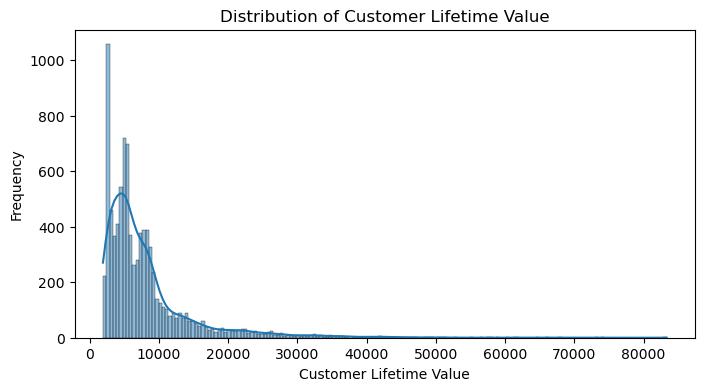

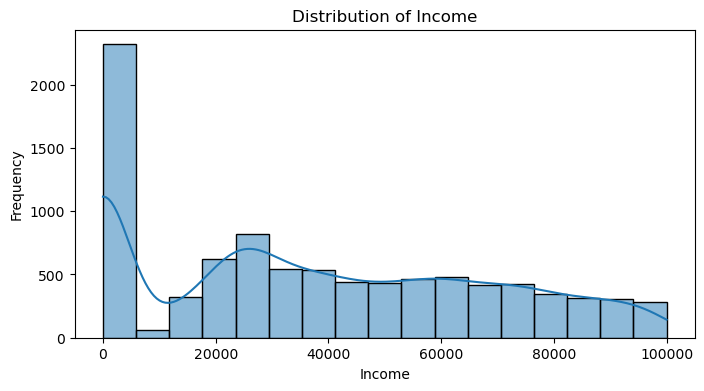

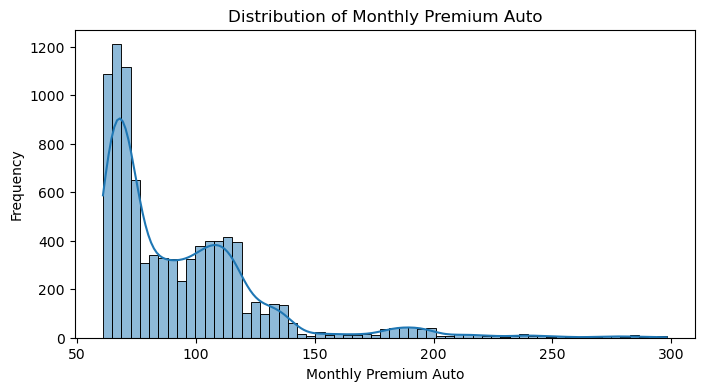

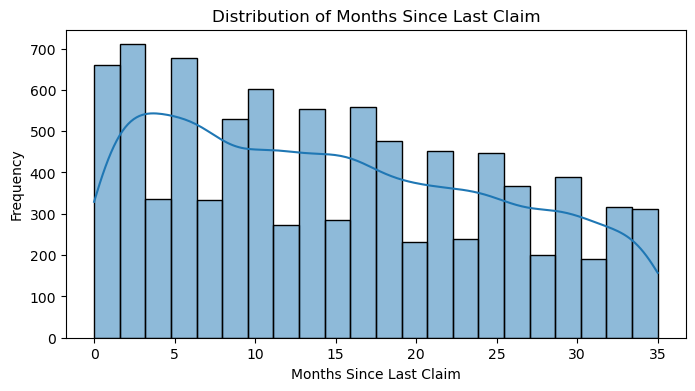

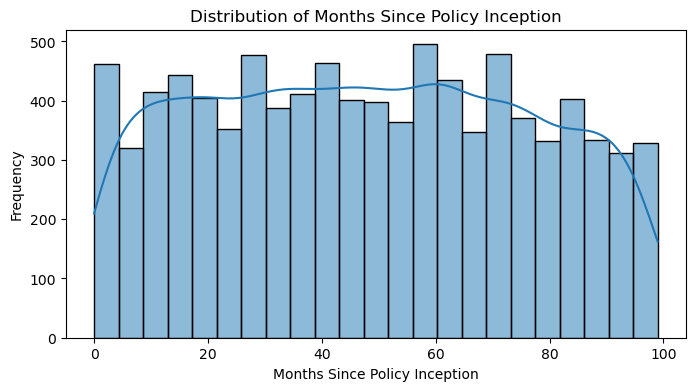

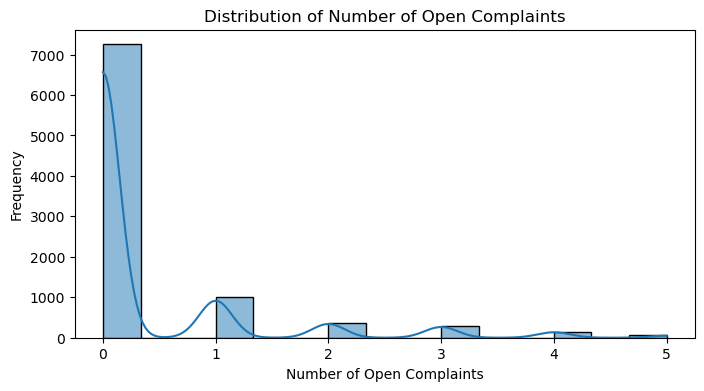

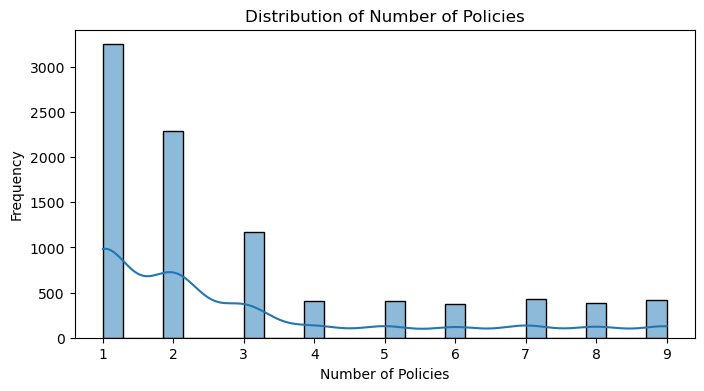

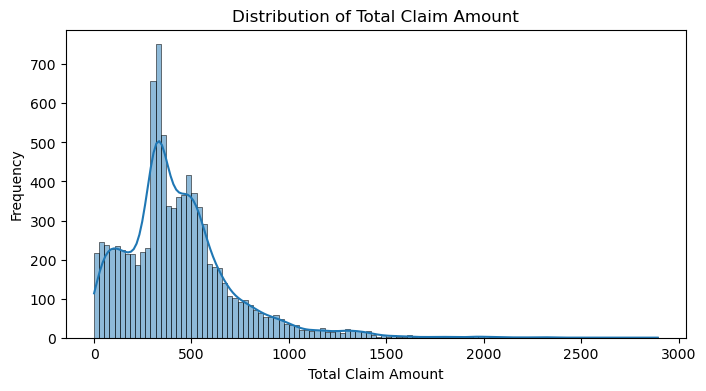

In [9]:
for col in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

1. Customer Lifetime Value, Income, Monthly premium autom Months since last claim and Total Claim amount do not follow a normal or exponential distribution.
2. Months Since Policy Inception has a normal distribution.
3. For number of Open Complaints and number of policies, I'm not sure

- Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

In [16]:
#log transformation
transformed_variable = np.log1p(df[variables])

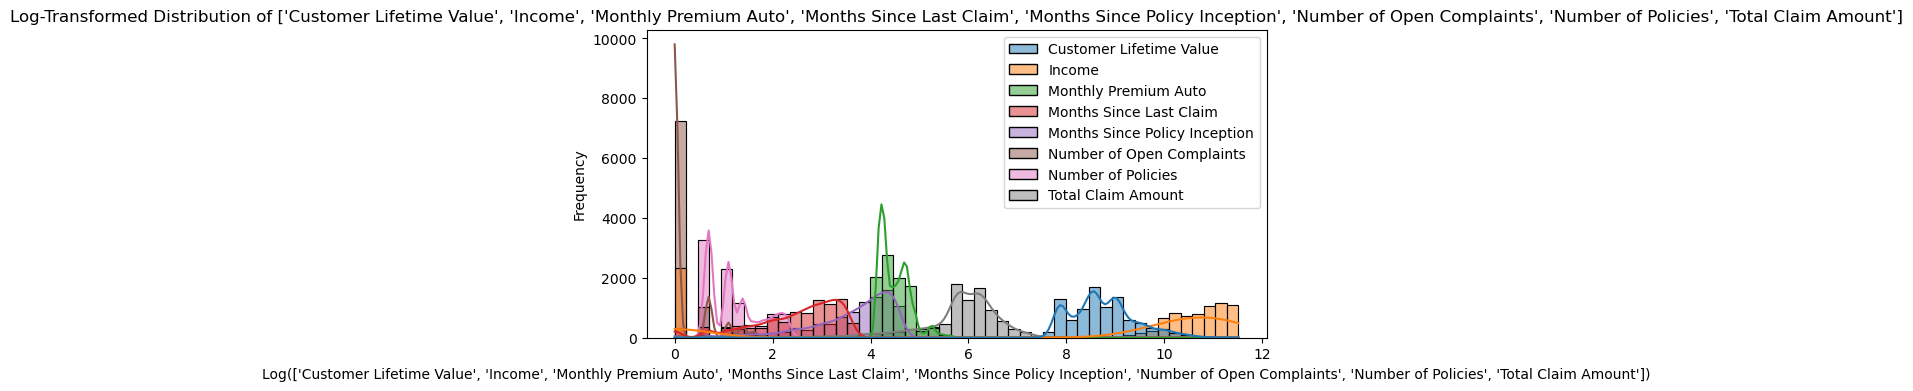

In [17]:
#distribution plot for the transformed variables
plt.figure(figsize=(8, 4))
sns.histplot(data=transformed_variable, kde=True)
plt.title(f"Log-Transformed Distribution of {variables}")
plt.xlabel(f"Log({variables})")
plt.ylabel("Frequency")
plt.show()

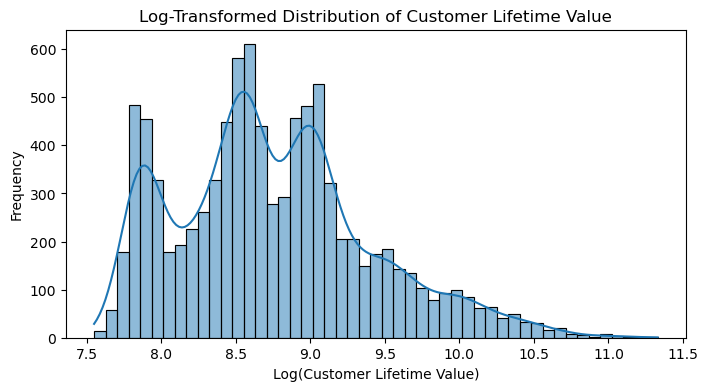

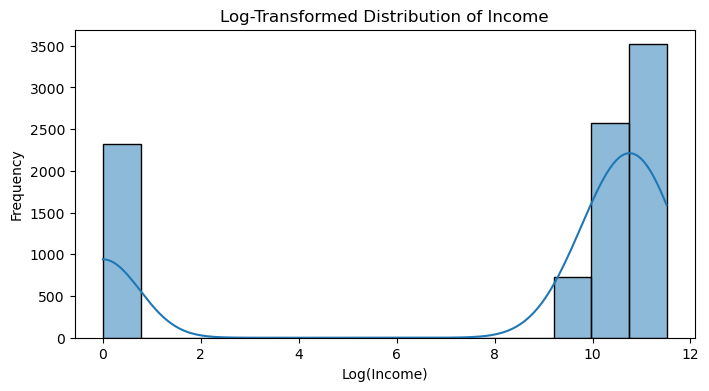

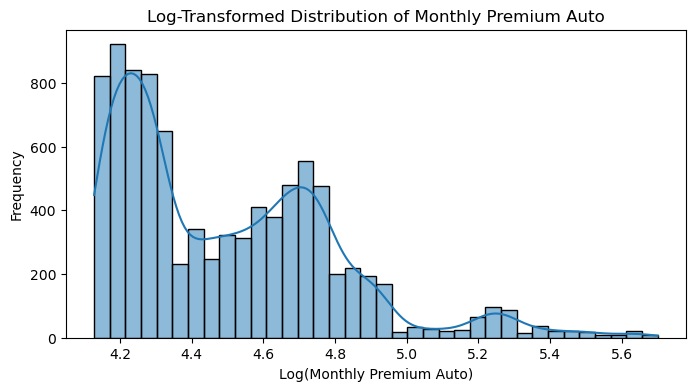

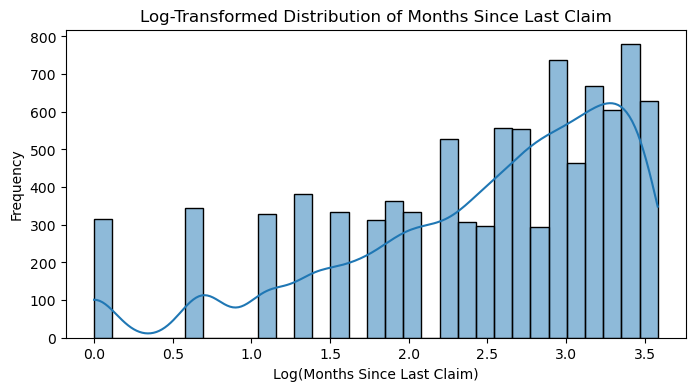

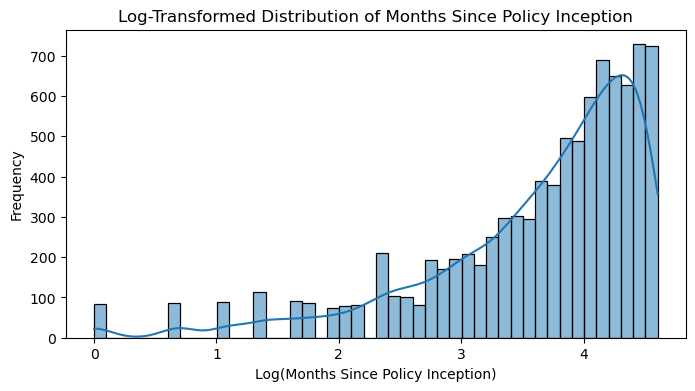

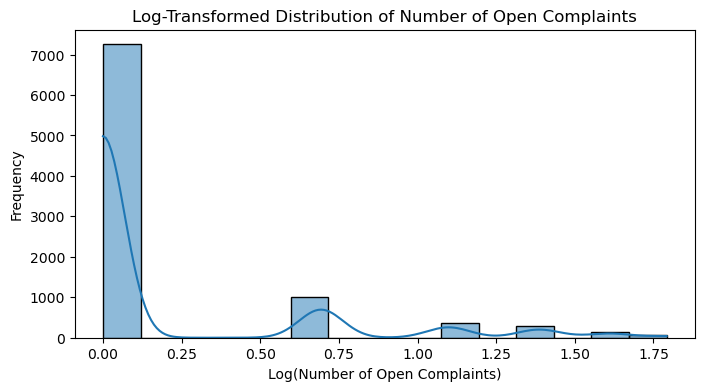

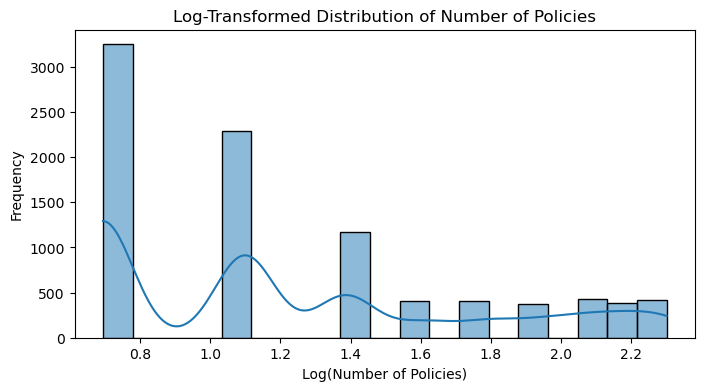

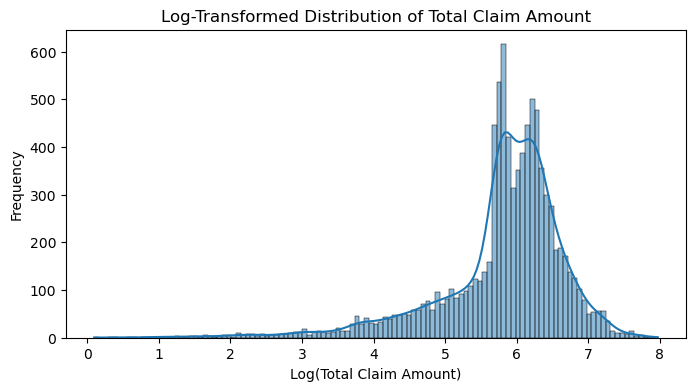

In [18]:
#absolutely unreadable even though beautiful. I will go ahead and separate them
for var in transformed_variable:
    transformed_var = np.log1p(df[var])  # Apply log transformation
    plt.figure(figsize=(8, 4))
    sns.histplot(data=transformed_var, kde=True)
    plt.title(f"Log-Transformed Distribution of {var}")
    plt.xlabel(f"Log({var})")
    plt.ylabel("Frequency")
    plt.show()

In [21]:
#trying boxcox
import scipy.stats as stats

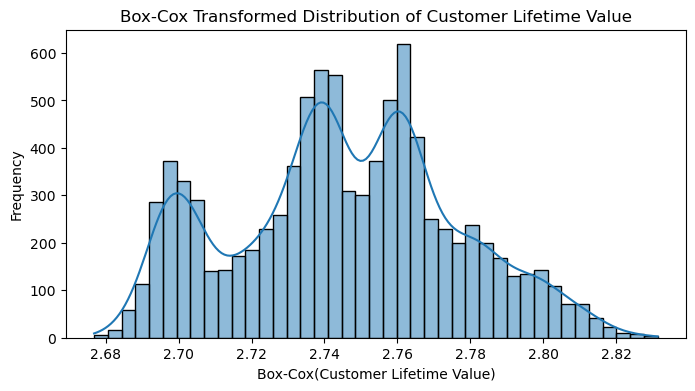

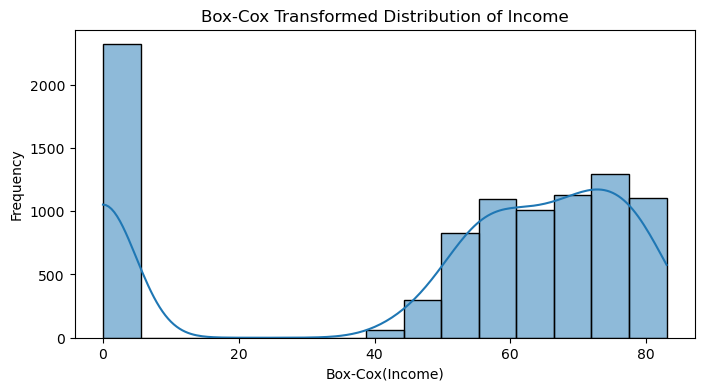

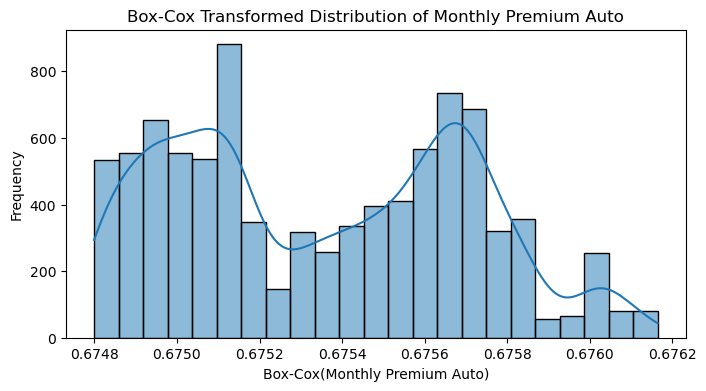

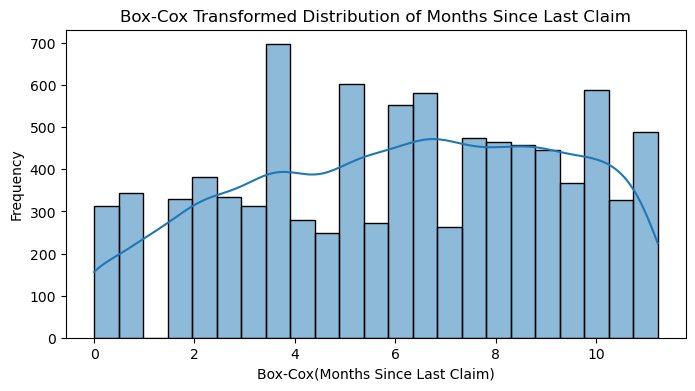

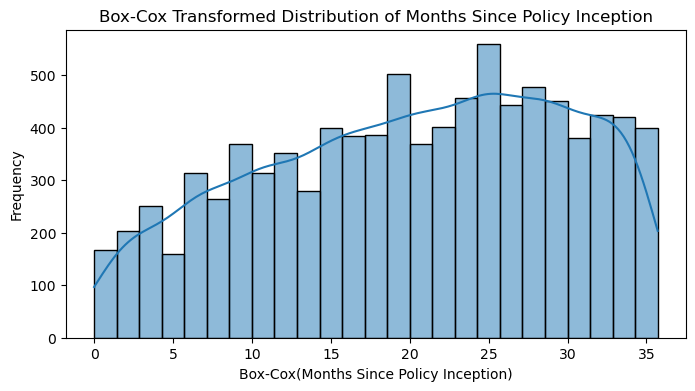

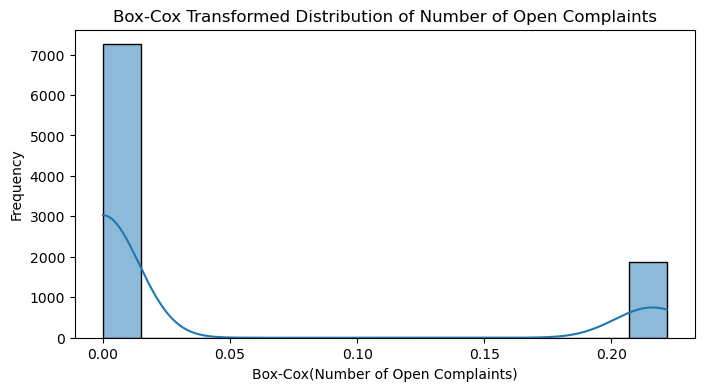

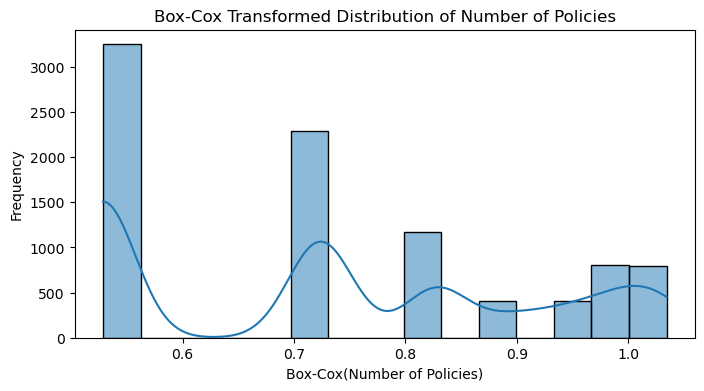

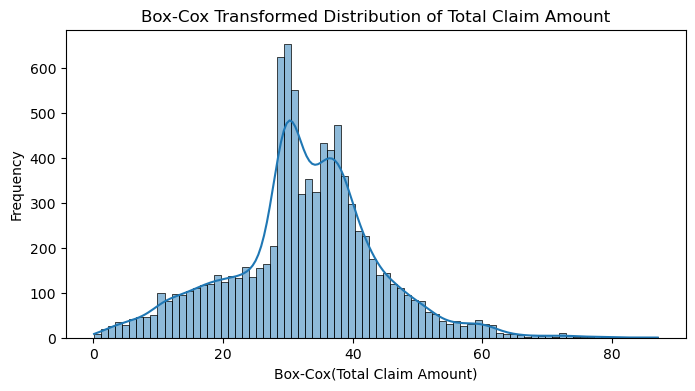

In [22]:
for var in transformed_variable:
    transformed_var, _ = stats.boxcox(df[var] + 1)
    plt.figure(figsize=(8, 4))
    sns.histplot(data=transformed_var, kde=True)
    plt.title(f"Box-Cox Transformed Distribution of {var}")
    plt.xlabel(f"Box-Cox({var})")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
#To me, boxcos is still better 